### Multi-Layer Perceptron

<br>

![image](https://blog.kakaocdn.net/dn/sEm4q/btqHemtBDX5/xKv8Pa7Pj1Gw5WPBhUHKY0/img.png)

### Basic Example with Keras (XOR Gate)

##### Configration of multi-layer

<br>

![image](https://miro.medium.com/max/956/0*mhzehd9X3n84PK9a.png)

In [35]:
import numpy as np
from tensorflow.keras import models, losses, layers, optimizers

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([0, 1, 1, 0])

# 1) Multi-Layer model
# 1-1) Generate Model and Network
model = models.Sequential()
model.add(layers.Dense(units=4, activation = 'sigmoid', input_shape = X[0].shape))
model.add(layers.Dense(units=1, activation='sigmoid'))
# 1-2) Set HyperParameter
opt = optimizers.Adam()
loss = losses.BinaryCrossentropy()
model.compile(optimizer=opt,
             loss=loss,
             metrics=['acc'])
# 2) Leaning data
model.fit(X,y, epochs=10, batch_size=4, verbose=0)
    # verbose : Change how results are expressed
        # verbose = 1 (default) : Express all data (training procecss, loss value, step interval time, accuracy)
        # verbose = 0 : Express only error and accuracy
        # verbose = 2 : Express simple data (loss and metrics)

# 3) Predict
Xtest_loss,Xtest_acc = model.evaluate(X,y)
print(Xtest_acc)
Ttest = model.predict(X)
print(Ttest)

1/1 [==============================] - 0s 80ms/step - loss: 0.6939 - acc: 0.2500
0.25
[[0.45859396]
 [0.4849218 ]
 [0.4809856 ]
 [0.5066407 ]]


In [36]:
for layer in model.layers:
    weights = layer.get_weights() 
    print(weights)

[array([[ 0.87521285,  0.7083407 , -0.09650965,  0.09414036],
       [ 0.94039446,  0.44940192, -0.38843232, -0.40123272]],
      dtype=float32), array([-0.00990577,  0.00991709, -0.00985193,  0.00983395], dtype=float32)]
[array([[-0.1445718 ],
       [ 0.5679039 ],
       [-0.8767633 ],
       [ 0.09343731]], dtype=float32), array([0.00983747], dtype=float32)]


In [37]:
W1 = model.layers[0].get_weights()[0] # w1 ~ w8
b1 = model.layers[0].get_weights()[1] # b_h1, b_h2
W2 = model.layers[1].get_weights()[0] # w9 ~ w12
b2 = model.layers[1].get_weights()[1] # b_o

print(W1.shape, W2.shape, b1.shape, b2.shape)

(2, 4) (4, 1) (4,) (1,)


In [38]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

y = sigmoid(np.dot(W2[0], sigmoid(np.dot(W1[:,0], X[1])+b1[0])))+b2
y

array([0.48393987])

### IRIS with Keras (Sequential API method)

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import models, layers, optimizers, losses

iris = load_iris()
X = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 1/3,
                                                   random_state = 0)

# MLP Model
model = models.Sequential([
    layers.Dense(units = 10, activation='sigmoid', input_shape = x_train[0].shape),
    layers.Dense(units = 6, activation='sigmoid'),
    layers.Dense(units = 1, activation='linear')
])

opt = optimizers.Adam()
loss = losses.BinaryCrossentropy()

model.compile(optimizer=opt, loss=loss)

model.fit(x_train, y_train, epochs = 1000, verbose = 0)
model.summary()
# Xtest_loss, Xtest_acc = model.evaluate(x_test,y_test)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_75 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 7         
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [40]:
accuracy_score(np.round(model.predict(x_test)) , y_test)

0.32

### Funtialnal API method

[Funtional API vs Sequential API Wikidocs](https://wikidocs.net/38861)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_75 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 7         
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


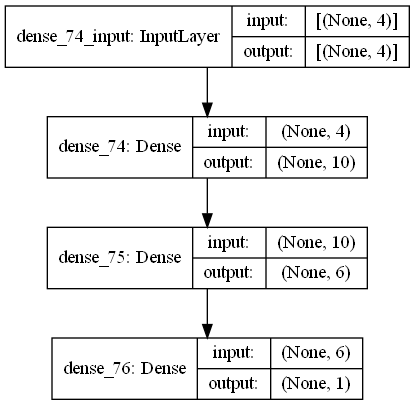

In [45]:
""" Sequential API
# MLP Model
model = models.Sequential([
    layers.Dense(units = 10, activation='sigmoid', input_shape = x_train[0].shape),
    layers.Dense(units = 6, activation='sigmoid'),
    layers.Dense(units = 1, activation='linear')
])
"""
# Funtional API method (More Network Freedom for design)
from tensorflow.keras import models, layers, optimizers, losses, Input, Model

inputs = Input(x_train[0].shape)
x1 = layers.Dense(units = 10, activation = 'sigmoid')(inputs)
x2 = layers.Dense(units = 6, activation = 'sigmoid')(x1)
outputs = layers.Dense(1, activation = 'linear')(x2)

opt = optimizers.Adam()
loss = losses.BinaryCrossentropy()
model.compile(optimizer=opt,
             loss=loss)

model.fit(x_train,y_train,
          epochs = 1000, verbose=0)

model.summary()
accuracy_score(np.round(model.predict(x_test)), y_test)
dot_img_file = './model_img/sequential_model.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_89 (Dense)                (None, 8)            40          input_18[0][0]                   
__________________________________________________________________________________________________
dense_92 (Dense)                (None, 8)            40          input_18[0][0]                   
__________________________________________________________________________________________________
dense_90 (Dense)                (None, 8)            72          dense_89[0][0]                   
____________________________________________________________________________________________

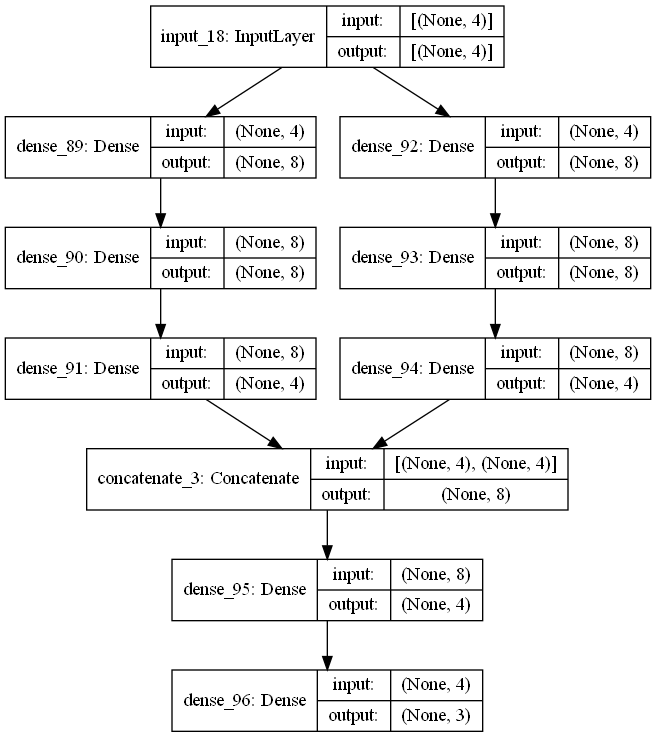

In [46]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, Input, Model, losses, optimizers
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model

# 1) IRIS 데이터셋 가져오고

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2) train/test 나누고

x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=1/3,
                                                   random_state=0)
# 3) 4 - 8 - 8 - 4
#        8 - 8 - 4 - 4 - 3

inputs = Input(x_train[0, :4].shape)
x1 = layers.Dense(8, activation='sigmoid')(inputs)
x1 = layers.Dense(8, activation='sigmoid')(x1)
x1 = layers.Dense(4, activation='sigmoid')(x1)

x2 = layers.Dense(8, activation='sigmoid')(inputs)
x2 = layers.Dense(8, activation='sigmoid')(x2)
x2 = layers.Dense(4, activation='sigmoid')(x2)

x = layers.concatenate([x1,x2])
x = layers.Dense(4, activation='sigmoid')(x)
outputs = layers.Dense(3, activation = 'softmax')(x)

model = Model(inputs = inputs, outputs = outputs)

model.summary()
dot_img_file = './model_img/Funtional_model.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

### IRIS data (Categorical + Fucntional API)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_28 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_113 (Dense)               (None, 4)            12          input_27[0][0]                   
__________________________________________________________________________________________________
dense_115 (Dense)               (None, 4)            12          input_28[0][0]                   
____________________________________________________________________________________________

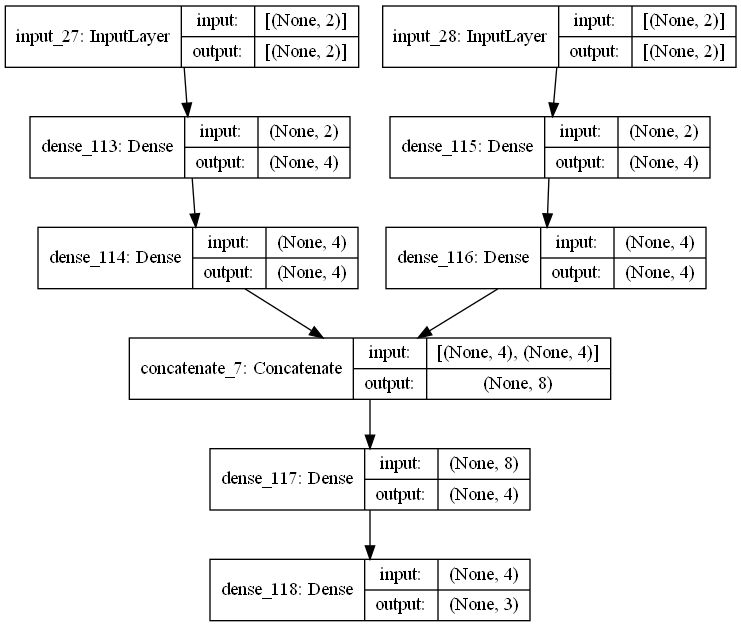

In [77]:
import numpy as np
from tensorflow.keras import Model, Input, losses, layers, optimizers
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X = load_iris().data
y = load_iris().target

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=1/3,
                                                   random_state=0)

y_train_enc = to_categorical(y_train, 3)
y_test_enc = to_categorical(y_test, 3)

# model 
    # 2-4-4 ㄱ
    # 2-4-4 ┘ - 4 - 3

input1 = Input(x_train[0,0:2].shape)
input2 = Input(x_train[0,2:].shape)

x1 = layers.Dense(units=4, activation='sigmoid')(input1)
x1 = layers.Dense(units=4, activation='sigmoid')(x1)

x2 = layers.Dense(units=4, activation='sigmoid')(input2)
x2 = layers.Dense(units=4, activation='sigmoid')(x2)

x = layers.concatenate([x1, x2])

x = layers.Dense(units=4, activation='sigmoid')(x)
outputs = layers.Dense(units=3, activation='softmax')(x)

model = Model(inputs = [input1, input2], outputs = outputs)

model.summary()
dot_img_file = './model_img/Funtional_model_iris.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

In [87]:
model.compile(optimizer='adam', 
             loss = 'sparse_categorical_crossentropy')

model.fit([x_train[:,:2],x_train[:,2:]], y_train, 
         epochs= 1000,
         verbose = 0)

In [93]:
y_pred = model.predict([x_test[:,:2],x_test[:,2:]])
y_pred = np.argmax(y_pred, axis = 1)
print(accuracy_score(y_test,y_pred))

0.94


### Regression

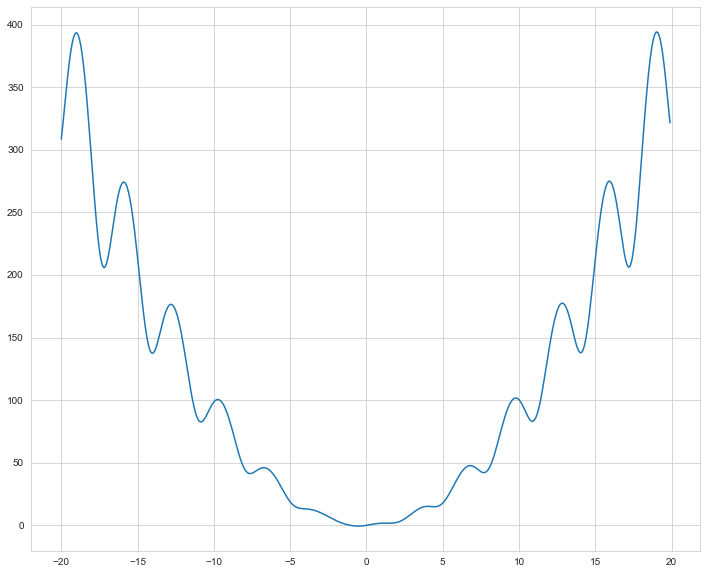

In [94]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras import models, layers
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(12, 10))

x = np.arange(-20, 20, 0.1) 
y = np.sin(2*x)+np.power(x,2)*np.log(np.power(np.cos(x),2)+2)

plt.plot(x,y)
plt.show()

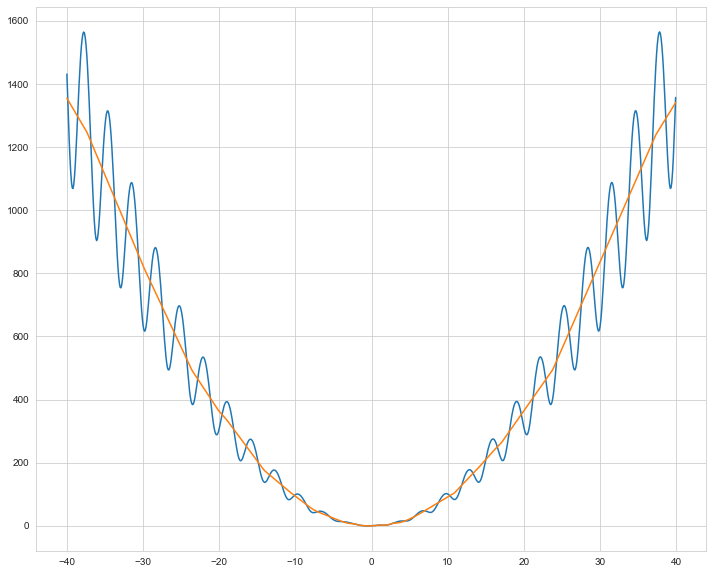

In [108]:
model = models.Sequential()

model.add(layers.Dense(100, activation = "relu", input_shape=(1,)))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(100, activation = "relu"))  
model.add(layers.Dense(1,activation='linear'))
          
model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['acc'])

model.fit(x,y,epochs = 3000,batch_size=4096, verbose = 0)

ytest = model.predict(x)

plt.figure(figsize=(12, 10))
plt.plot(x,y)
plt.plot(x,ytest)

##### Vanishing Gradient

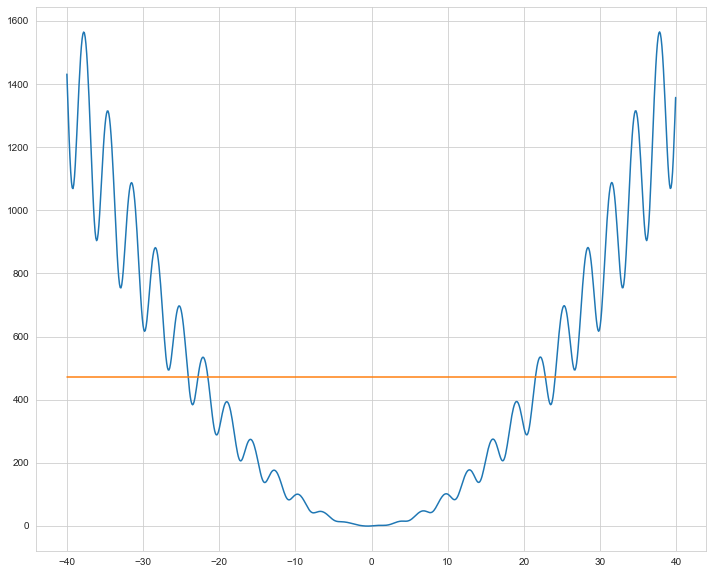

In [109]:
model = models.Sequential()

model.add(layers.Dense(100, activation = "sigmoid", input_shape=(1,)))
model.add(layers.Dense(100, activation = "sigmoid"))
model.add(layers.Dense(100, activation = "sigmoid"))
model.add(layers.Dense(100, activation = "sigmoid"))
model.add(layers.Dense(100, activation = "sigmoid"))
model.add(layers.Dense(100, activation = "sigmoid"))
model.add(layers.Dense(100, activation = "sigmoid"))
model.add(layers.Dense(100, activation = "sigmoid"))
model.add(layers.Dense(100, activation = "sigmoid"))
model.add(layers.Dense(100, activation = "sigmoid"))
model.add(layers.Dense(1,activation='linear'))
          
model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['acc'])

model.fit(x,y,epochs = 10000, batch_size = 4096, verbose = 0)

ytest = model.predict(x)

plt.figure(figsize=(12, 10))
plt.plot(x,y)
plt.plot(x,ytest)

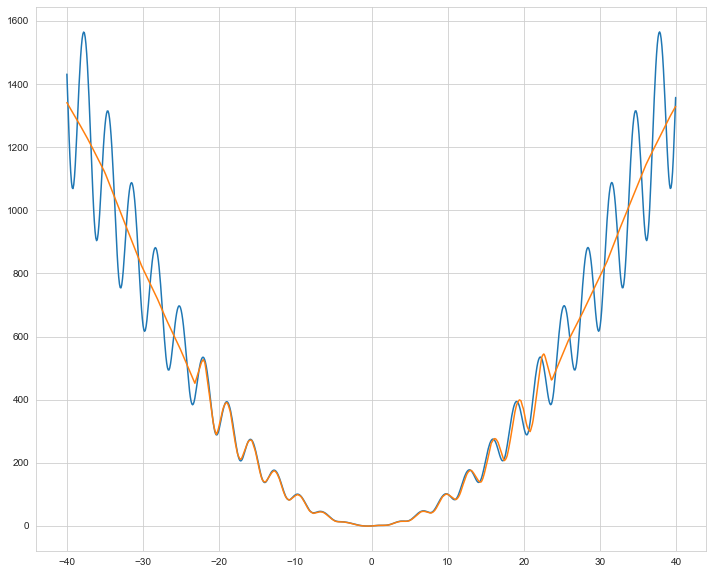

In [111]:
model = models.Sequential()

model.add(layers.Dense(100, activation = "relu", input_shape=(1,)))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(1,activation='linear'))
          
model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['acc'])

model.fit(x,y,epochs = 4000, batch_size = 4096, verbose = 0)

ytest = model.predict(x)

plt.figure(figsize=(12, 10))
plt.plot(x,y)
plt.plot(x,ytest)

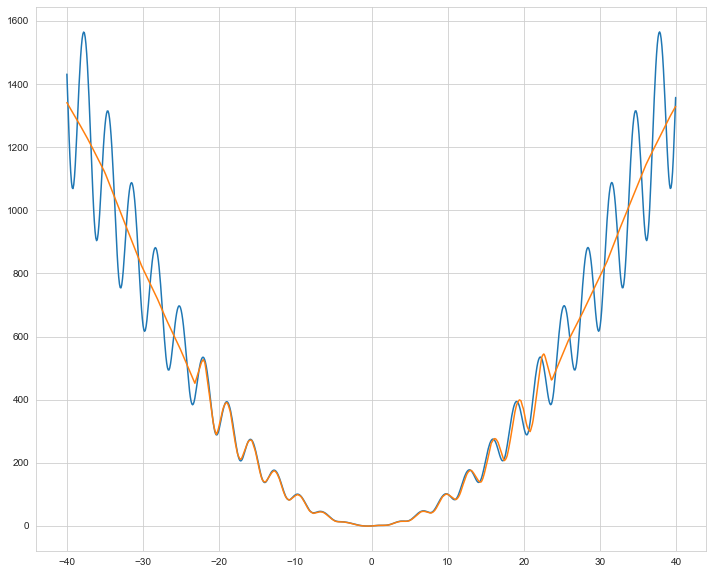

In [113]:
x = np.arange(-40, 40, 0.1) 
y = np.sin(2*x)+np.power(x,2)*np.log(np.power(np.cos(x),2)+2)

xtest = np.arange(-40,40,0.1)
ytest = model.predict(xtest) 

plt.figure(figsize=(12, 10))
plt.plot(x,y)
plt.plot(xtest,ytest)

plt.show()

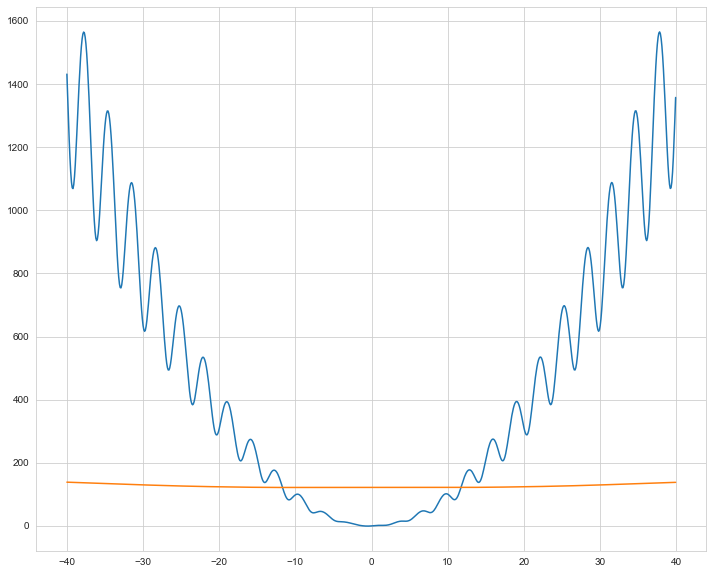

In [114]:
model = models.Sequential()

model.add(layers.Dense(100, activation = "relu", input_shape=(1,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation = "relu"))  
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='linear'))
          
model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['mse'])

model.fit(x,y,epochs = 10000,batch_size=4096,
         verbose = 0)

ytest = model.predict(x)

plt.figure(figsize=(12, 10))
plt.plot(x,y)
plt.plot(x,ytest)
plt.show()